# Fetching data

In [1]:
from sklearn.datasets import fetch_openml

In [2]:
mnist = fetch_openml('mnist_784')

In [3]:
mnist  # data fetch

{'data':        pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  pixel8  pixel9  \
 0           0       0       0       0       0       0       0       0       0   
 1           0       0       0       0       0       0       0       0       0   
 2           0       0       0       0       0       0       0       0       0   
 3           0       0       0       0       0       0       0       0       0   
 4           0       0       0       0       0       0       0       0       0   
 ...       ...     ...     ...     ...     ...     ...     ...     ...     ...   
 69995       0       0       0       0       0       0       0       0       0   
 69996       0       0       0       0       0       0       0       0       0   
 69997       0       0       0       0       0       0       0       0       0   
 69998       0       0       0       0       0       0       0       0       0   
 69999       0       0       0       0       0       0       0       0       0   
 
      

In [4]:
x,y = mnist['data'], mnist['target']

In [5]:
x.shape # find shape of x

(70000, 784)

In [6]:
y.shape # find shape of y

(70000,)

In [7]:
%matplotlib inline

In [8]:
import matplotlib          
import matplotlib.pyplot as plt

In [9]:
some_digit = x.iloc[3601]     # show the image
some_digit_image = some_digit.to_numpy().reshape(28, 28)  # Convert to NumPy array and reshape


(np.float64(-0.5), np.float64(27.5), np.float64(27.5), np.float64(-0.5))

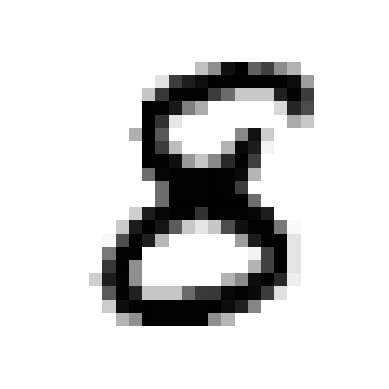

In [10]:
plt.imshow(some_digit_image, cmap=matplotlib.cm.binary, interpolation="nearest")
plt.axis("off")  # also we can show the image axis

In [11]:
y[3601]   # show real image number 

'8'

In [12]:
x_train, x_test = x[:6000], x[6000:7000]  

In [13]:
y_train, y_test = y[:6000], y[6000:7000]

In [14]:
import numpy as np
shuffle_index = np.random.permutation(6000)
x_train, y_train = x_train.iloc[shuffle_index],y_train.iloc[shuffle_index]

## Creating a 2 detector

In [15]:
y_train = y_train.astype(np.int8)  
y_test = y_test.astype(np.int8)
y_train_2 = (y_train==2) # if there is two  in the array then is true esle false
y_test_2 = (y_test==2)

In [16]:
y_train

3851    1
2614    6
5817    9
5499    5
120     2
       ..
3584    8
687     9
4601    5
915     5
1663    4
Name: class, Length: 6000, dtype: int8

# clasifier

In [17]:
from sklearn.linear_model import LogisticRegression

In [18]:
clf = LogisticRegression(tol = 0.1)

In [19]:
clf.fit(x_train, y_train_2)

LogisticRegression(tol=0.1)

In [20]:
clf.predict([some_digit])

C:\Users\Sameer Beg\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


array([False])

In [21]:
from sklearn.model_selection import cross_val_score
a = cross_val_score(clf, x_train, y_train, cv=3, scoring="accuracy")

In [22]:
a

array([0.8735, 0.8755, 0.8905])

In [23]:
a.mean()

np.float64(0.8798333333333334)